In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import plot_model
import os
from IPython.display import Image


In [17]:
#importing dataset
df = pd.read_csv(r'C:\Users\nihca\OneDrive\Documents\vscode\edaproject\Final_Augmented_dataset_Diseases_and_Symptoms.csv')
df=df[df['diseases'].notnull()]
df

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246940,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246941,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246942,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246943,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#assigning numerical values for every disease
le=LabelEncoder()
df["diseases_encoded"]=le.fit_transform(df["diseases"])

In [19]:
df["diseases_encoded"]

0         531
1         531
2         531
3         531
4         531
         ... 
246940    506
246941    506
246942    506
246943    506
246944    506
Name: diseases_encoded, Length: 246945, dtype: int32

In [20]:
#to standardize data
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df.drop(columns=["diseases","diseases_encoded"]))
scaled_data

array([[ 4.94844929, -0.21131779,  3.25095032, ...,  0.        ,
        -0.00853792,  0.        ],
       [-0.20208351, -0.21131779,  3.25095032, ...,  0.        ,
        -0.00853792,  0.        ],
       [ 4.94844929,  4.73220926,  3.25095032, ...,  0.        ,
        -0.00853792,  0.        ],
       ...,
       [-0.20208351, -0.21131779, -0.30760236, ...,  0.        ,
        -0.00853792,  0.        ],
       [-0.20208351, -0.21131779, -0.30760236, ...,  0.        ,
        -0.00853792,  0.        ],
       [-0.20208351, -0.21131779, -0.30760236, ...,  0.        ,
        -0.00853792,  0.        ]])

In [21]:
#to create a range in the dataset
min_max_scaler = MinMaxScaler()

In [22]:
num_classes = df['diseases_encoded'].nunique()

y_onehot = tf.keras.utils.to_categorical(df['diseases_encoded'], num_classes=num_classes)

In [23]:
#to treat class imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df['diseases_encoded']),
    y=df['diseases_encoded']
)
class_weight_dict = dict(enumerate(class_weights))

In [24]:
len(df['diseases_encoded'].unique())

773

In [25]:
class_weight_dict

{0: 2.3149502221722256,
 1: 0.7849216969527448,
 2: 1.1015970022750592,
 3: 16.813848982093006,
 4: 0.9368420253952116,
 5: 10.648771021992237,
 6: 8.873975851660198,
 7: 3.8031325078543707,
 8: 0.6440788924592079,
 9: 0.3514445881845623,
 10: 0.2653348261293747,
 11: 0.2633661423411106,
 12: 0.35260831198649795,
 13: 35.49590340664079,
 14: 1.5212530031417484,
 15: 0.3518316416957788,
 16: 0.4677351839820895,
 17: 0.2646753360892851,
 18: 0.7083439704207697,
 19: 0.35260831198649795,
 20: 0.35105838534040346,
 21: 4.3762072693118785,
 22: 0.6351155679120619,
 23: 9.12751801885049,
 24: 106.48771021992238,
 25: 0.6263982954113081,
 26: 0.910151369401046,
 27: 0.48039568520265735,
 28: 1.2986306124380778,
 29: 0.35299793443068195,
 30: 8.191362324609415,
 31: 0.9395974431169621,
 32: 0.9507831269635927,
 33: 6.797087886378025,
 34: 79.86578266494179,
 35: 5.324385510996119,
 36: 1.4135536754856952,
 37: 15.973156532988357,
 38: 0.965145409848239,
 39: 6.389262613195343,
 40: 26.62192755

In [26]:
#model definition
X = min_max_scaler.fit_transform(scaled_data)
y = y_onehot

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = keras.Sequential([
    layers.Input(shape=(X.shape[1],)),
    
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),
    
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.2),
    
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │        48,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 773)            │        50,245 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,653 (420.52 KB)

 Trainable params: 107,269 (419.02 KB)

 Non-trainable params: 384 (1.50 KB)

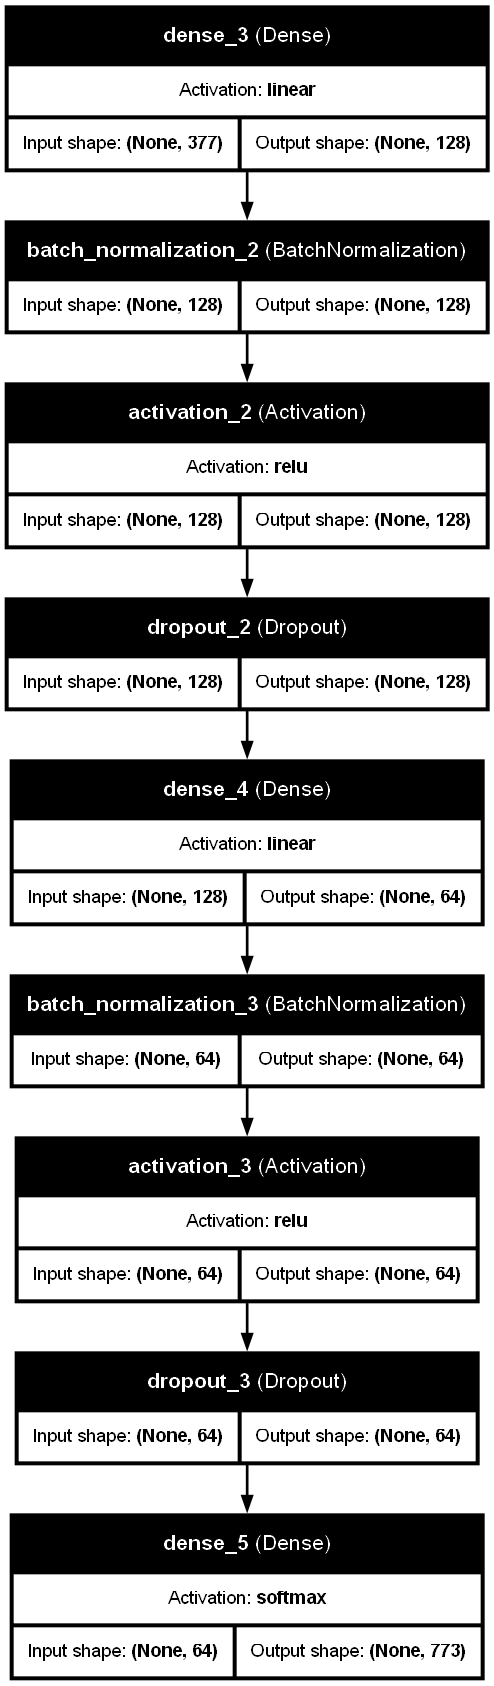

In [27]:
#visualizing the model architecture

vis_dir = r'C:\Users\nihca\OneDrive\Documents\vscode\edaproject\neural\visualizations'
os.makedirs(vis_dir, exist_ok=True)

plot_model(
    model,
    to_file=os.path.join(vis_dir, 'model_architecture.png'),
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',  
    dpi=96,
    show_layer_activations=True
)

Image(os.path.join(vis_dir, 'model_architecture.png'))

In [28]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001,
    verbose=1
)



In [29]:
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weight_dict,
    verbose=1
)

Epoch 1/50
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.3356 - loss: 4.9447 - val_accuracy: 0.7778 - val_loss: 1.0125 - learning_rate: 0.0010
Epoch 2/50
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.3356 - loss: 4.9447 - val_accuracy: 0.7778 - val_loss: 1.0125 - learning_rate: 0.0010
Epoch 2/50
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.6027 - loss: 2.4804 - val_accuracy: 0.7804 - val_loss: 0.8809 - learning_rate: 0.0010
Epoch 3/50
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.6027 - loss: 2.4804 - val_accuracy: 0.7804 - val_loss: 0.8809 - learning_rate: 0.0010
Epoch 3/50
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.6370 - loss: 1.9136 - val_accuracy: 0.7925 - val_loss: 0.7579 - learning_rate: 0.0010
Epoch 4/50
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.6370 - loss: 1.9136 - val_accuracy: 0.7925 - val_loss: 0.7579 - learning_rate: 0.0010
Epoch 4/50
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.6

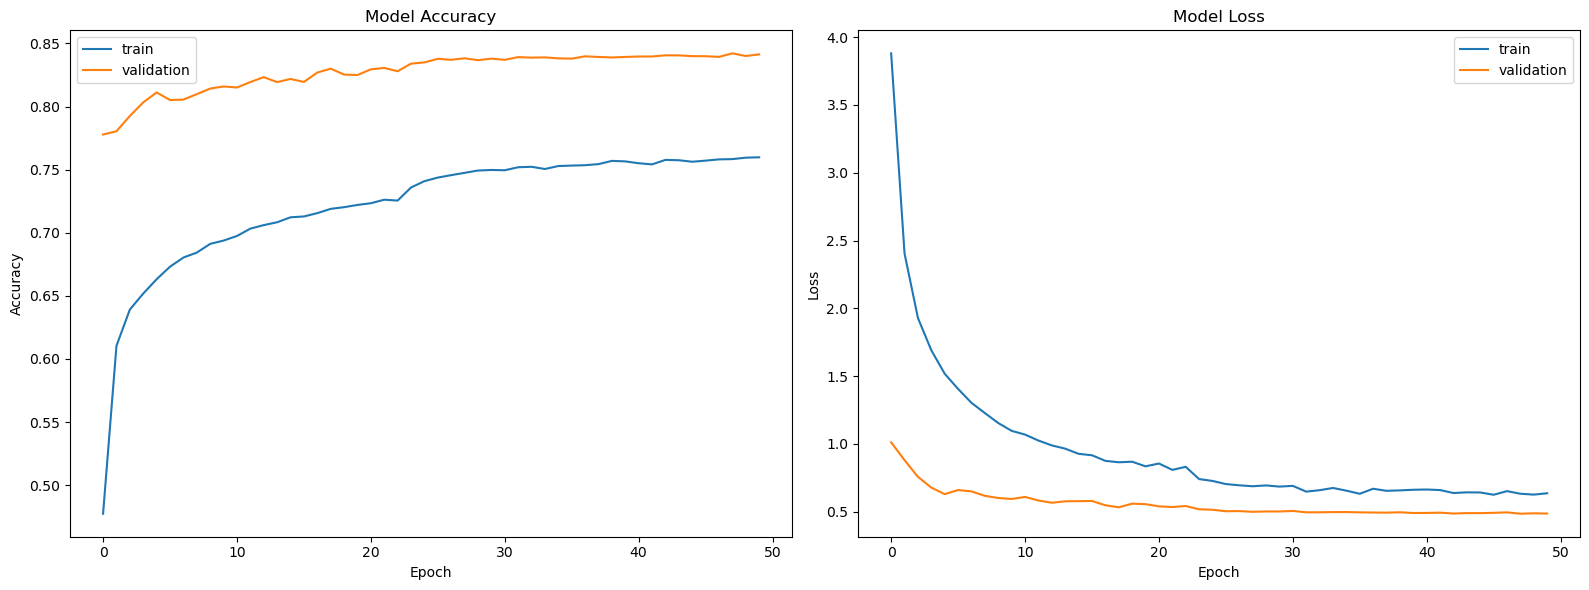

In [ ]:
#plotting accuracy graph of the model
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(history.history['accuracy'], label='train')
ax1.plot(history.history['val_accuracy'], label='validation')
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend()

ax2.plot(history.history['loss'], label='train')
ax2.plot(history.history['val_loss'], label='validation')
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend()

plt.tight_layout()
plt.show()

In [32]:
#model.save(r'C:\Users\nihca\OneDrive\Documents\vscode\edaproject\neural\disease_classification_model.keras')

#joblib.dump(scaler, r'C:\Users\nihca\OneDrive\Documents\vscode\edaproject\neural\standard_scaler.pkl')
#joblib.dump(min_max_scaler, r'C:\Users\nihca\OneDrive\Documents\vscode\edaproject\neural\min_max_scaler.pkl')
#joblib.dump(le, r'C:\Users\nihca\OneDrive\Documents\vscode\edaproject\neural\label_encoder.pkl')

